CNN Notebook © Arkaprabha Majumdar

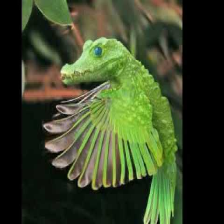

In [2]:
import cv2
import urllib
import numpy as np
from google.colab.patches import cv2_imshow

req = urllib.request.urlopen('https://i.ytimg.com/vi/hic1K5Aee78/hqdefault.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
img = cv2.resize(img,(224,224))
cv2_imshow(img)

In [3]:
from keras.applications import VGG19
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input,decode_predictions

model = VGG19(weights = 'imagenet')
#VGG19 is a pretrained model of 19 layers

Using TensorFlow backend.


574717952/574710816 [==============================] - 40s 0us/step


In [4]:
print(model.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
input_image = img.reshape((1,224,224,3))

input_image = preprocess_input(input_image)

In [27]:
preds = model.predict(input_image)
print('Predicted',decode_predictions(preds,top=3)[0])

Predicted [('n01818515', 'macaw', 0.7403285), ('n01820546', 'lorikeet', 0.07909966), ('n01693334', 'green_lizard', 0.050229542)]


In [32]:
#get the class index
np.argmax(preds[0])

88

In [36]:
out = model.output[:,88]
last_conv_layer = model.get_layer('block5_conv4')

#gradients of macaw class
grads = K.gradients(out,last_conv_layer.output)[0]

#each entry is mean intensity of gradient over specific feature map channel
pooled_grads = K.mean(grads,axis=(0,1,2))

#access values we just defined for our sample image
iterate = K.function([model.input],[pooled_grads,last_conv_layer.output[0]])

#values of pooled grad values and conv layer output
pooled_grads_value,conv_layer_outt_val = iterate([input_image])

#multiply each channel in feature map by importance
for i in range(512):
  conv_layer_outt_val[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_outt_val,axis = -1)

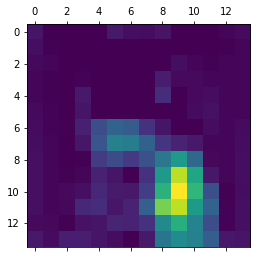

In [34]:
#plotting the heatmap
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

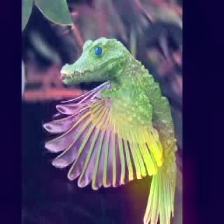

In [23]:
#using OpenCV to overlay this with input image
import cv2

process_heatmap = 255 * cv2.resize(heatmap,(img.shape[1],img.shape[0]))
process_heatmap = process_heatmap.astype(np.uint8)
process_heatmap = cv2.applyColorMap(process_heatmap,cv2.COLORMAP_PLASMA)

superimpose_img = process_heatmap * 0.4 + img

cv2_imshow(superimpose_img)

In [1]:
heatmap1 = 255 * cv2.resize(heatmap,(input_image.shape[2],input_image.shape[1]))
heatmap1 = cv2.resize(heatmap1,(224,224),3)
added_image = cv2.addWeighted(img,0.4,heatmap1,0.1,0)

NameError: ignored

In [40]:
heatmap.shape

(224, 224)

In [10]:
img.shape

(224, 224, 3)

In [15]:
process_heatmap.shape

(224, 224)